Import the python packages

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from PIL import Image
from IPython.display import display, clear_output
from utils.dataset import AdverCityDataset

In [2]:
plt.rcParams['figure.dpi'] = 150

Define the path to the desired scenario.

In [3]:
root = '/Users/Teo/Documents/2.Queens/1.Masters/1.Research/Assignment_1/advercity/ui_cd_s'

Create an instance of the AdverCityDataset class.

In [4]:
dataset = AdverCityDataset(root=root, car=0, cam=0)

We can use the class as an iterator. In the example below, we animate the images using a `for-loop`.

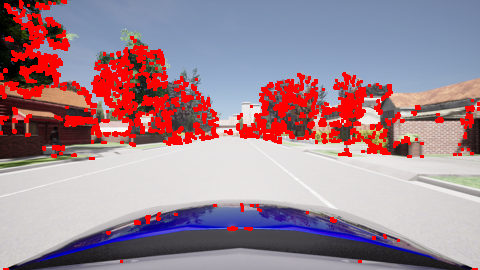

In [ ]:
for cam_ref, cam_intrinsics, cam_image in dataset:
    # Define the scaling factor
    scale_factor = 0.25  

    # Calculate the new size
    new_size = (int(cam_image.width * scale_factor), int(cam_image.height * scale_factor))

    # Resize the image
    scaled_image = cam_image.resize(new_size, Image.BICUBIC)
    image = np.array(scaled_image)
    image_bgr = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    gray = cv.cvtColor(image_bgr, cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    corners = cv.cornerHarris(gray, 2, 3, 0.04)
    corners = cv.dilate(corners, None)
    threshold = 0.01 * corners.max()
    image_bgr[corners > threshold] = [0, 0, 255]
    image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)
    pil_image_with_corners = Image.fromarray(image_rgb)

    # Display image
    display(pil_image_with_corners)
    time.sleep(0.01)
    clear_output(wait=True)

We can use different data as well. For example, we can get the ground truth position and attitude of the car.

In [ ]:
all_data = []

Let's get the information car `0`.

In [ ]:
dataset = AdverCityDataset(root=root, car=0, cam=0)
data = []
for cam_ref, cam_intrinsics, cam_image in dataset:
    data.append(cam_ref)
all_data.append(data)

Let's do the same for the remaining cars available in each scenario of this dataset.

In [ ]:
dataset = AdverCityDataset(root=root, car=1, cam=0)
data = []
for cam_ref, cam_intrinsics, cam_image in dataset:
    data.append(cam_ref)
all_data.append(data)

In [ ]:
dataset = AdverCityDataset(root=root, car=2, cam=0)
data = []
for cam_ref, cam_intrinsics, cam_image in dataset:
    data.append(cam_ref)
all_data.append(data)

We can now prepare some nice plots. Let's start by checking the ground truth trajectory of each car.

In [ ]:
fig, axis = plt.subplots()

for car_data in all_data:
    # Let's convert the data to a numpy array to facilitate the access
    array = np.array(car_data)

    # Plot the trajectory. The data is a list which columns follow this order: x, y, z, roll, pitch, yaw, speed
    axis.plot(array[:, 0], array[:, 1])

axis.legend(['car0', 'car1', 'car2'])
axis.set_xlabel('x [meters]')
axis.set_ylabel('y [meters]')
axis.set_title('Ground Truth Trajectories')
plt.show()